In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

# Data Preprocessing

In [6]:
df.fillna({'Age':df['Age'].median(),
           'Embarked':df['Embarked'].mode()[0]
          },inplace=True) #Filling missing values with median(for Age column) and mode (use for Embarked column)

In [7]:
df.drop(columns=['Cabin'], inplace=True) # Drop Cabin due to too many missing values

### Encode categorical variables(Sex,Embarked)

In [8]:
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


# Feature Engineering

In [9]:
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2,4,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0,1,1


In [10]:
# Extract Title
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df["Title"].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [11]:
# Normalize similar titles
df['Title'] = df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
# Replace uncommon titles with 'Rare'
df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr',
                                   'Major','Rev','Sir','Jonkheer','Dona'],'Rare')

In [12]:
#Encode Titles numerically
le = LabelEncoder()
df['Title'] = le.fit_transform(df['Title'])

In [13]:
df['Title'].value_counts()

Title
2    517
1    185
3    126
0     40
4     23
Name: count, dtype: int64

In [14]:
# Drop unnecessary columns for Analysis

In [15]:
df.drop(columns=['Name','Ticket','PassengerId'], inplace=True)

In [16]:
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  \
0         0       3    1  22.0      1      0   7.2500         2           2   
1         1       1    0  38.0      1      0  71.2833         0           2   
2         1       3    0  26.0      0      0   7.9250         2           1   
3         1       1    0  35.0      1      0  53.1000         2           2   
4         0       3    1  35.0      0      0   8.0500         2           1   

   IsAlone  Title  
0        0      2  
1        0      3  
2        1      1  
3        0      3  
4        1      2  


### Train-Test Split

In [17]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)



### Logistic Regression

In [19]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)

In [20]:

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))


Logistic Regression Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Decision Tree

In [21]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)


In [22]:
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_dt))
print(classification_report(y_val, y_pred_dt))


Decision Tree Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



#### plot Decision Tree

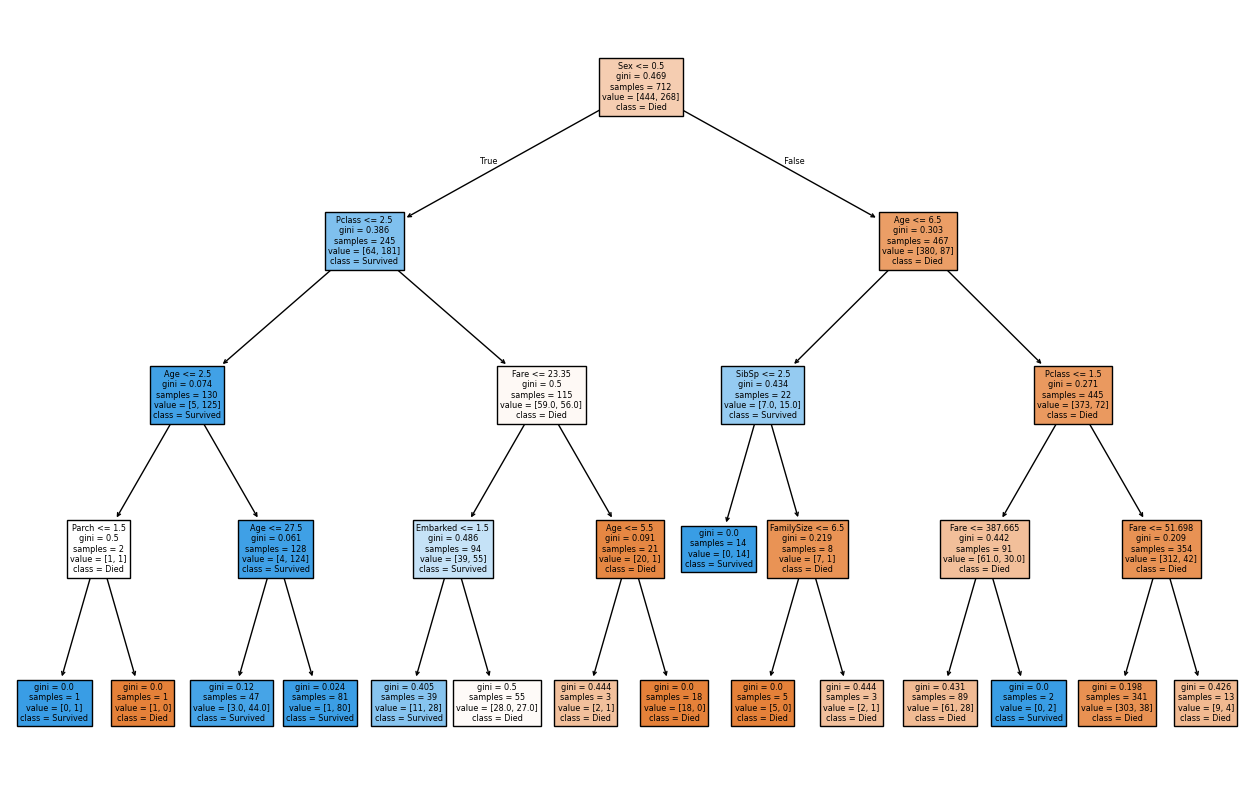

In [23]:
plt.figure(figsize=(16,10))
plot_tree(dt, feature_names=X.columns, class_names=['Died','Survived'], filled=True)
plt.show()

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

In [26]:
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [27]:
### Linear Regression

In [28]:
from sklearn.linear_model import  LinearRegression

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = np.round(lin_reg.predict(X_val)) 


In [30]:
print("Accuracy:", accuracy_score(y_val, y_pred_lin))
print(classification_report(y_val, y_pred_lin))

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [31]:
from xgboost import XGBClassifier

In [32]:
xgb = XGBClassifier( eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)


In [33]:
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### Confusion Matrices

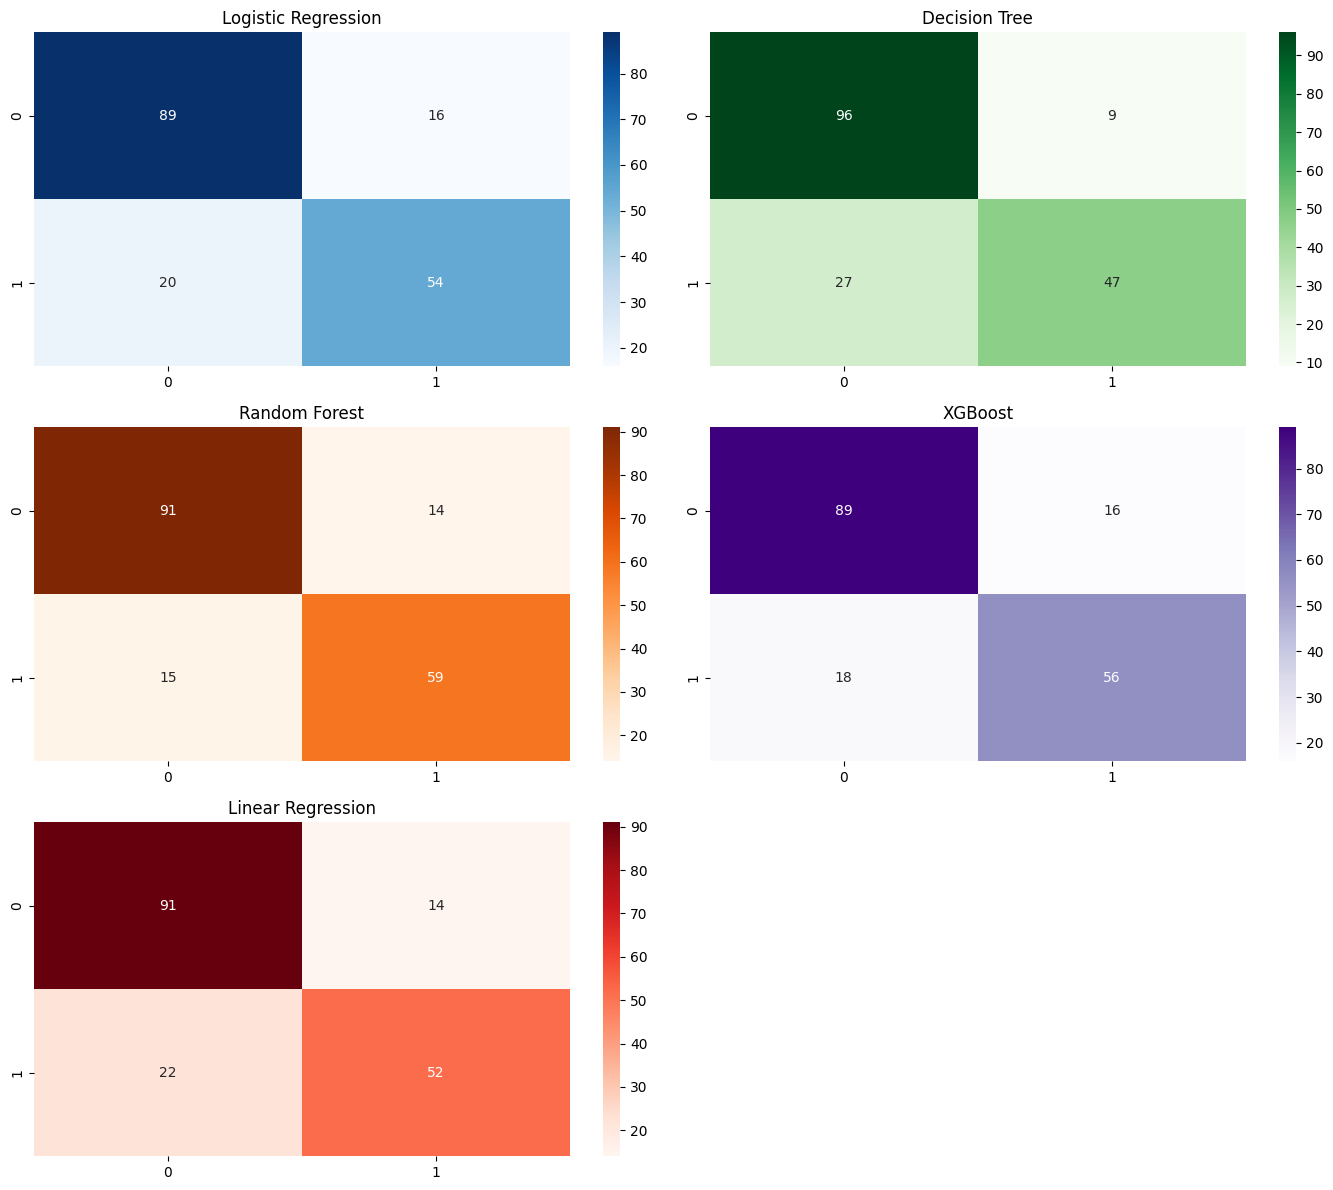

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(14,12))  
axes = axes.flatten()  # make indexing easy

# Logistic Regression
sns.heatmap(confusion_matrix(y_val, y_pred_lr), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")

# Decision Tree
sns.heatmap(confusion_matrix(y_val, y_pred_dt), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Decision Tree")

# Random Forest
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("Random Forest")

# XGBoost
sns.heatmap(confusion_matrix(y_val, y_pred_xgb), annot=True, fmt="d", cmap="Purples", ax=axes[3])
axes[3].set_title("XGBoost")

# Linear Regression
sns.heatmap(confusion_matrix(y_val, y_pred_lin), annot=True, fmt="d", cmap="Reds", ax=axes[4])
axes[4].set_title("Linear Regression")


fig.delaxes(axes[5])

plt.tight_layout()
plt.show()



### Cross Validation

In [35]:
cv_results = {
    "Logistic Regression": cross_val_score(log_reg, X, y, cv=5).mean(),
    "Decision Tree": cross_val_score(dt, X, y, cv=5).mean(),
    "Random Forest": cross_val_score(rf, X, y, cv=5).mean(),
    "XGBoost": cross_val_score(xgb, X, y, cv=5).mean()
}
print("Cross Validation Scores")
for model, score in cv_results.items():
    print(f"{model}: {score:.4f}")


Cross Validation Scores
Logistic Regression: 0.7935
Decision Tree: 0.8149
Random Forest: 0.8115
XGBoost: 0.8227


In [36]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}


In [37]:

results = {}

for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    results[name] = {
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1-score': scores['test_f1'].mean(),
        'ROC-AUC': scores['test_roc_auc'].mean()
    }
results

{'Logistic Regression': {'Accuracy': np.float64(0.8005318625036935),
  'Precision': np.float64(0.7517098839535815),
  'Recall': np.float64(0.6972746331236898),
  'F1-score': np.float64(0.7221859591609209),
  'ROC-AUC': np.float64(0.7799320050194546)},
 'Decision Tree': {'Accuracy': np.float64(0.7570274795626908),
  'Precision': np.float64(0.6731300311737253),
  'Recall': np.float64(0.6904262753319357),
  'F1-score': np.float64(0.6814249520791578),
  'ROC-AUC': np.float64(0.7438341795454366)},
 'Random Forest': {'Accuracy': np.float64(0.796375455530385),
  'Precision': np.float64(0.7420154624676044),
  'Recall': np.float64(0.7125786163522012),
  'F1-score': np.float64(0.725691100169301),
  'ROC-AUC': np.float64(0.7797826687481129)},
 'XGBoost': {'Accuracy': np.float64(0.8019895597360387),
  'Precision': np.float64(0.7583829787234041),
  'Recall': np.float64(0.7014675052410901),
  'F1-score': np.float64(0.7269700394669002),
  'ROC-AUC': np.float64(0.7820795136011375)}}

In [38]:
results_df = pd.DataFrame(results).T  # (Taking transpose to make models rows)
results_df = results_df.round(3)      
print(results_df)

                     Accuracy  Precision  Recall  F1-score  ROC-AUC
Logistic Regression     0.801      0.752   0.697     0.722    0.780
Decision Tree           0.757      0.673   0.690     0.681    0.744
Random Forest           0.796      0.742   0.713     0.726    0.780
XGBoost                 0.802      0.758   0.701     0.727    0.782


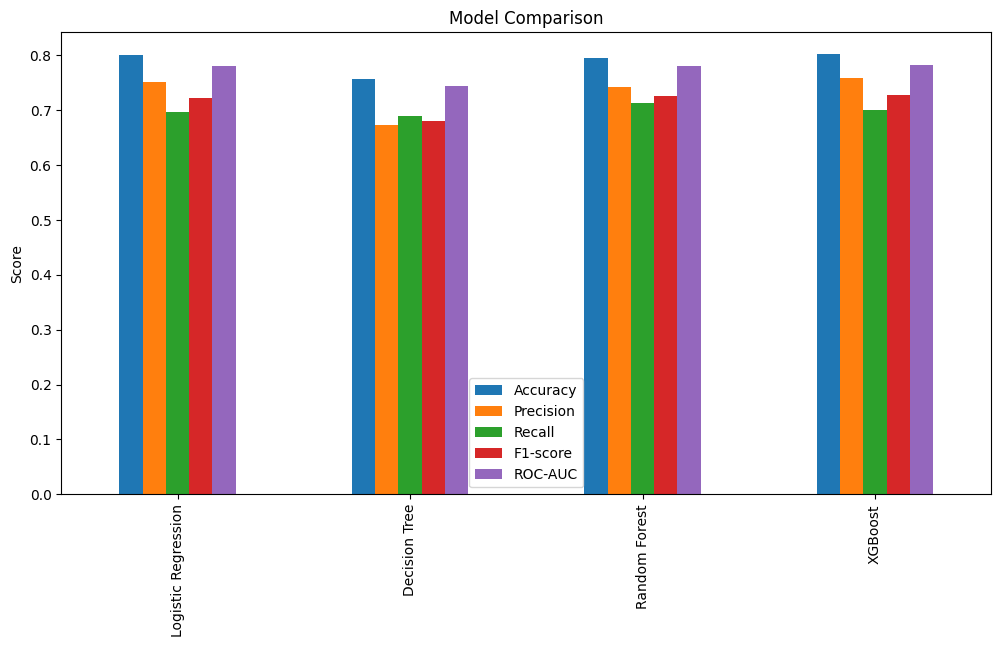

In [39]:
results_df.plot(kind='bar', figsize=(12,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()


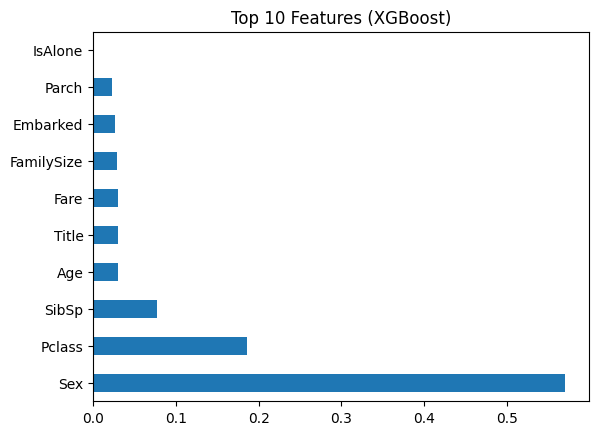

In [40]:
feature_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features (XGBoost)")
plt.show()
